Ex29


In [124]:
import numpy as np

def f(t, u):
    return 0.1 * t * (1 - u**2)

def rk2_step(t, u, h):
    k1 = f(t, u)
    k2 = f(t + h/4, u + h/4 * k1)
    return u + h * (-k1 + 2*k2)

def exact(t):
    return np.tanh(t**2 / 20)

T = 2.0
N = 200
h = T / N

t = 0.0
u = 0.0

for _ in range(N):
    u = rk2_step(t, u, h)
    t += h

error = abs(u - exact(t))
print("Numerical u(T):", u)
print("Exact u(T):     ", exact(t))
print("Error:          ", error)


Numerical u(T): 0.1973755363120522
Exact u(T):      0.19737532022490425
Error:           2.160871479528481e-07


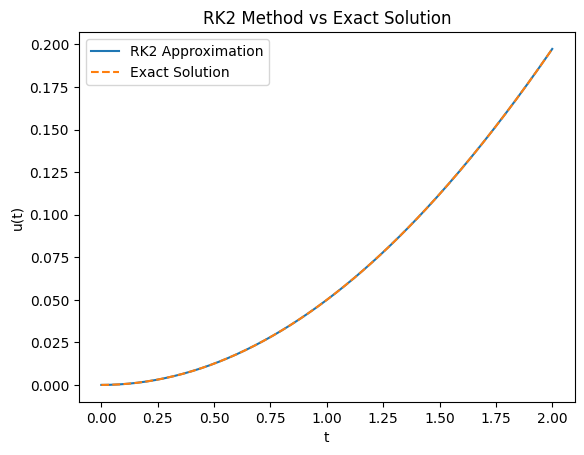

In [125]:
# plotting
import matplotlib.pyplot as plt
t_values = np.linspace(0, T, N+1)
u_values = np.zeros(N+1)
u = 0.0
t = 0.0
u_values[0] = u
for i in range(1, N+1):
    u = rk2_step(t, u, h)
    t += h
    u_values[i] = u
plt.plot(t_values, u_values, label='RK2 Approximation')
plt.plot(t_values, exact(t_values), label='Exact Solution', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.title('RK2 Method vs Exact Solution')
plt.show()

Ex30b

In [126]:
def euler(f, t, u0):
    n = len(t)
    m = len(u0)
    U = np.zeros((m,n))
    U[:,0] = u0
    
    for j in range(n-1):
        h  = t[j+1]-t[j]
        k1 = f(t[j], U[:,j])
        U[:,j+1] = U[:,j] + h*k1
        
    return U

def runge(f, t, u0):
    n = len(t)
    m = len(u0)
    U = np.zeros((m,n))
    U[:,0] = u0
    
    for j in range(n-1):
        h  = t[j+1]-t[j]
        k1 = f(t[j], U[:,j])
        k2 = f(t[j]+h/2, U[:,j]+h/2*k1)
        U[:,j+1] = U[:,j] + h*k2
        
    return U


In [127]:
def ClassicalRungeKutta(f,t,u0):
    n = len(t)
    m = len(u0)
    U = np.zeros((m, n))
    U[:, 0] = u0
    for j in range(n-1):
        h = t[j+1] - t[j]
        k1 = np.array(f(t[j], U[:, j]))
        k2 = np.array(f(t[j] + (h/2), U[:, j] + k1 * (h/2)))
        k3 = np.array(f(t[j] + (h/2), U[:, j] + k2 * (h/2)))
        k4 = np.array(f(t[j] + h, U[:, j] + k3 * h))
        U[:, j+1] = U[:, j] + (k1 + 2*k2 + 2*k3 + k4) * (h/6)
    return U

In [128]:
def mathematical_pendulum(t, y):
    u, v = y
    return np.array([v, -np.sin(u)])

def H(u, v):
    return 0.5 * v**2 - np.cos(u)


Initial energy: -0.5403023058681398
Euler final energy: -0.4561503021998523
Runge final energy: -0.5403023058775682


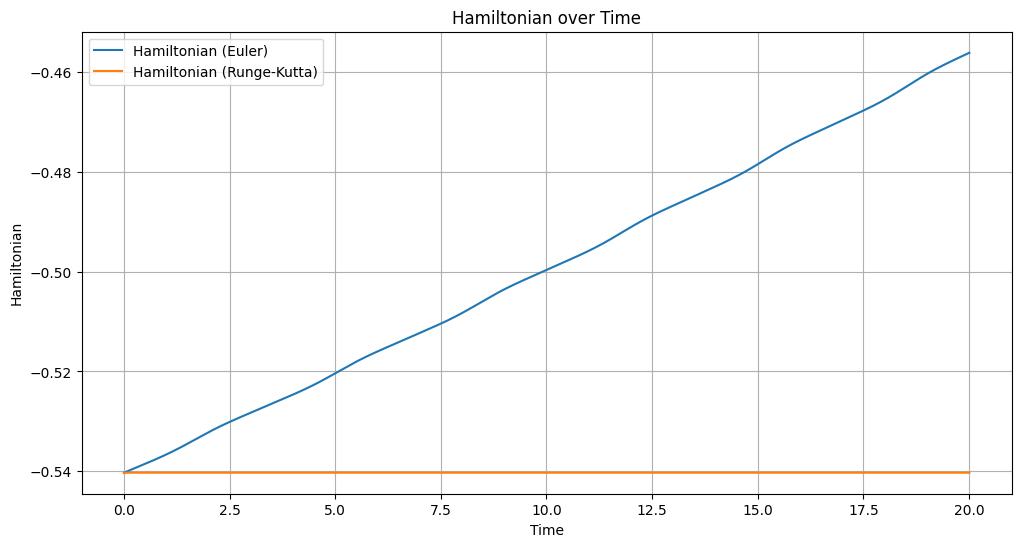

In [ ]:

t0 = 0.0
T  = 20.0
h  = 0.01

t = np.arange(t0, T + h, h)
u0 = np.array([1.0, 0.0])   


U_euler = euler(mathematical_pendulum, t, u0)

u_e = U_euler[0, :]
v_e = U_euler[1, :]
H_e = H(u_e, v_e)

U_runge = ClassicalRungeKutta(mathematical_pendulum, t, u0)

u_r = U_runge[0, :]
v_r = U_runge[1, :]
H_r = H(u_r, v_r)

print("Initial energy:", H(1.0, 0.0))
print("Euler final energy:", H_e[-1])
print("Runge final energy:", H_r[-1])

# plot H const
plt.figure(figsize=(12, 6))
plt.plot(t, H_e, label='Hamiltonian (Euler)')
plt.plot(t, H_r, label='Hamiltonian (Runge-Kutta)')
plt.title('Hamiltonian over Time')
plt.xlabel('Time')
plt.ylabel('Hamiltonian')
plt.legend()
plt.grid()
plt.show()


Ex30c

In [130]:
def linear_pendulum(t, y):
    u, v = y
    return np.array([v, -u])

def V(u, v):
    return 0.5 * (u**2 + v**2)


In [ ]:
U_lin = ClassicalRungeKutta(linear_pendulum, t, u0)
U_lin_r = runge(linear_pendulum, t, u0)

u_l = U_lin[0, :]
v_l = U_lin[1, :]
V_rk   = V(u_l, v_l)


print("Initial energy:", V_rk[0])
print("Runge Kutta final energy:", V_rk[-1])



Initial energy: 0.5
Runge Kutta final energy: 0.4999999999861032
